# Script to plot structural modal amplitudes

# Import packages

In [1]:
from lacbox.io import load_cmb, load_amp
from lacbox.vis import plot_amp
from lacbox.test import test_data_path
import matplotlib.pyplot as plt
import matplotlib
import scienceplots
matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])
# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'normal'

# Import data

In [2]:
# Structural

# Path to the .cmb file
cmb_path = 'structural_Campbell_BB_vs_windspeed.cmb'
cmb_type = "structural"

# Load the data
wsp, dfreqs, zetas = load_cmb(cmb_path, cmb_type)  # wind speed, damped natural freqs, and damping values

# print the shape
dfreqs.shape  # n_wsp x n_modes

nmodes = dfreqs.shape[1]  # get number of modes
# mode_names = [f'Mode {i}' for i in range(1, nmodes+1)]  # list of mode shape names
mode_names = ['Tower for-aft', 'Tower side-side', '1st flapwise BW', '1st flapwise FW', '1st flapwise sym',
              '1st edgewise BW', '1st edgewise FW', '2nd flapwise BW', '2nd flapwise FW', '1st flapwise sym', '1st edgewise sym']

# Path to the .amp file
amp_path = 'structural_modal_amplitudes_BB.amb'

# Load the modal amplitudes
amp_df = load_amp(amp_path)

print(amp_df.index)
# amp_df.head()
print(amp_df.columns)


Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,            10,            11,
                  12,            13,            14,            15,
                  16,            17,            18,            19,
                  20,            21,            22,            23,
                  24,            25,            26,            27,
                  28,            29,            30, 'mode_number'],
      dtype='object')
Index(['Wind speed', 'TWR x [m]', 'phase [deg]', 'TWR y [m]', 'phase [deg]',
       'TWR yaw [rad]', 'phase [deg]', 'SFT x [m]', 'phase [deg]', 'SFT y [m]',
       ...
       'BW flap [m]', 'phase [deg]', 'FW flap [m]', 'phase [deg]',
       'Sym tors [rad]', 'phase [deg]', 'BW tors [rad]', 'phase [deg]',
       'FW tors [rad]', 'phase [deg]'],
      dtype='object', length=331)


c:\Users\jason\anaconda3\Lib\site-packages\lacbox\io.py:85: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, comment='#', header=None)


# Plot the Campbells

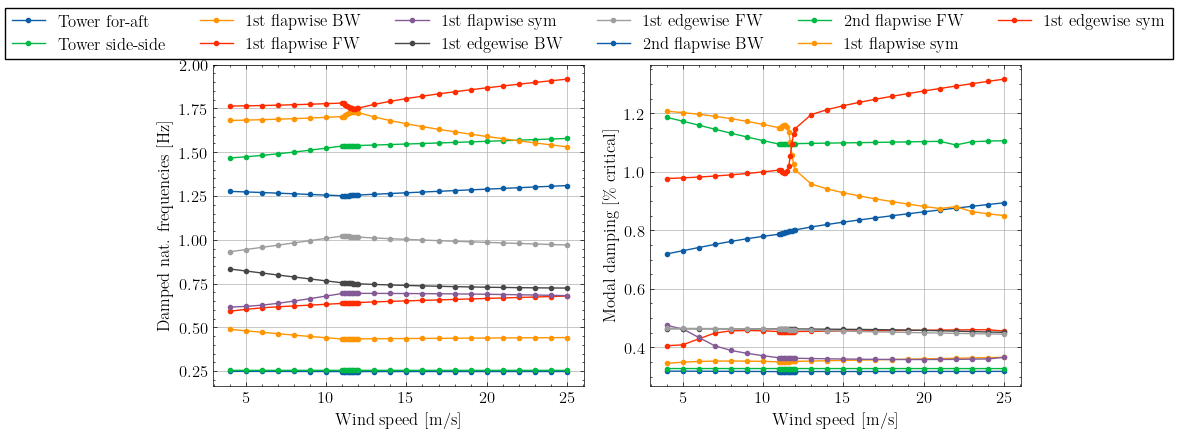

In [3]:
# Structural
fig, axs = plt.subplots(1, 2, figsize=(9, 4.5))

# left plot: damped nat freqs in ground-fixed frame
axs[0].plot(wsp, dfreqs, marker='.')
axs[0].set(xlabel='Wind speed [m/s]', ylabel='Damped nat. frequencies [Hz]')
axs[0].grid()

# right plot: percent criticl damping
lines = axs[1].plot(wsp, zetas, marker='.')
axs[1].set(xlabel='Wind speed [m/s]', ylabel=r'Modal damping [\% critical]')
axs[1].grid()

# add legend with 6 columns in center
fig.legend(loc='outside upper center', handles=lines, labels=mode_names, ncols=6)

fig.tight_layout(rect=[0, 0, 1, 0.9])

# Visualize

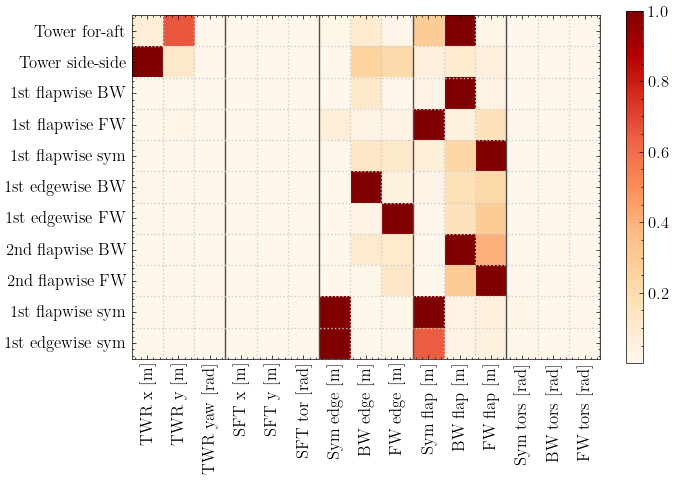

In [5]:
wsp = 11.2  # choose a wind speed (I chose the rated wind speed)
fig, ax = plot_amp(amp_df, mode_names, wsp)
# plt.savefig('Plots/structural_modal_amplitudes_BB' + '.pdf', dpi=300, bbox_inches='tight')